In [213]:
# 1. Seleccionar 2 imagenes que requieran una mejora de contraste
# 2. Aplica 2 tecnicas que permitan mejorar el contraste
# una con dev propio y otra con OpenCV
# 3. Aplica las dos tecnicas a las 2 imagenes
# 4. Describe como seleccionaste la mejor tecnica para el ajuste de intensidad
# 5. Describe caracteristicas de las tecnicas seleccionadas
# 6. Compara y concluye

In [214]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [215]:
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [216]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [217]:
img01 = cv2.imread("r1.png", cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread("p2.jpg", 1)

In [218]:
img01

array([[  0,   0,   0, ...,  39, 255, 255],
       [  0,   0,   0, ...,  39, 255, 255],
       [  0,   0,   0, ...,  37, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [219]:
def invert_color():
    h, w = img01.shape

    imgInvert = np.zeros((h, w), np.uint8)

    for j in range(h):
        for i in range(w):
            newValue = 0
            valor_actual = img01[j, i]
            #
            
            if (valor_actual > 200):
                newValue = int((255 - img01[j, i]) - 100)
                            
            if (valor_actual < 30):
                newValue = int((255 - img01[j, i]) + 50)
            else:
                newValue = int((255 - img01[j, i]))



            imgInvert[j, i] = np.clip(newValue, 0, 255)

    imshow("IMG INVERT", imgInvert)

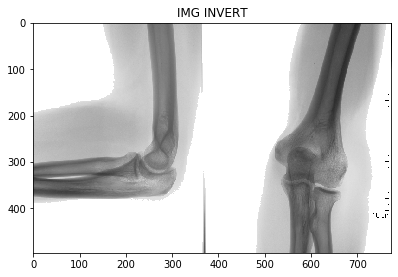

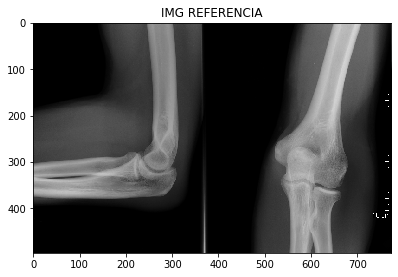

In [220]:
invert_color()
imshow("IMG REFERENCIA", img01)

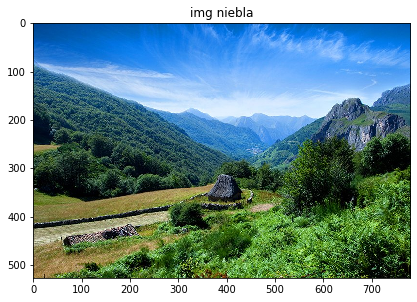

In [221]:
imshow("img niebla", img02)

In [222]:
def mejora_contraste():
    # Definir constantes a sumar a cada canal
    c_azul = 0
    c_verde = 10
    c_rojo = 0
    
    cv2.split(img02)
    
    canal_azul, canal_verde, canal_rojo = cv2.split(img02)
    
    print(canal_azul)
    
    c_azul_const = np.clip(canal_azul.astype(int) + c_azul, 0, 255).astype(np.uint8)
    c_verde_const = np.clip(canal_verde.astype(int) + c_verde, 0, 255).astype(np.uint8)
    c_rojo_const = np.clip(canal_rojo.astype(int) + c_rojo, 0, 255).astype(np.uint8)
    
    imagen_final = cv2.merge((c_azul_const, c_verde_const, c_rojo_const))
    
    plt.imshow(cv2.cvtColor(imagen_final, cv2.COLOR_BGR2RGB))
    plt.title('imagen')
    plt.show()
    
    return imagen_final
    

    

[[142 143 143 ... 176 176 176]
 [143 143 143 ... 177 177 177]
 [143 143 143 ... 178 178 178]
 ...
 [ 54  68  70 ...   0   0   0]
 [ 58  65  66 ...   1  13  28]
 [ 78  68  65 ...  63  60  48]]


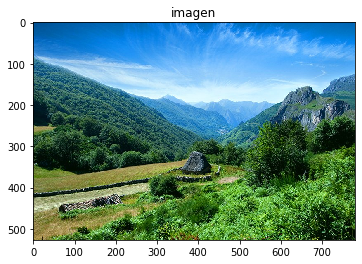

In [223]:
mejora_contraste()

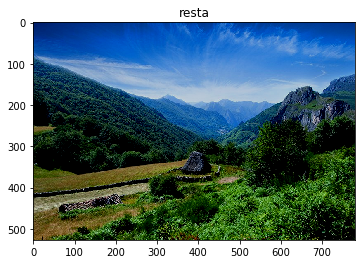

In [224]:
def restar_intensidad():
    M = np.ones(img02.shape, dtype = "uint8") * 40 
    img_resta = np.clip(img02.astype(np.int16) - M, 0, 255).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_resta, cv2.COLOR_BGR2RGB))
    plt.title('resta')
    plt.show()
    return img_resta
    
restar_intensidad()

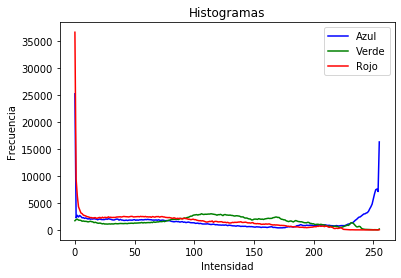

In [225]:
plot_rgb_histogramTodo(img02)

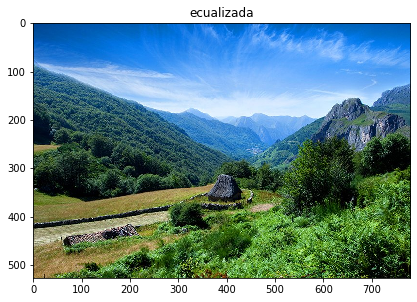

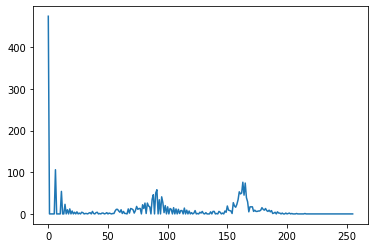

In [226]:
b, g, r = cv2.split(img02)
# Ecualizar el canal de valor (V)
equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)

# Fusionar los canales nuevamente en la imagen HSV
equ_image = cv2.merge([equ_b,equ_g,equ_r])
imshow("ecualizada",img02)

hist = cv2.calcHist(equ_image, [0], None, [256], [0, 256])
plt.plot(hist)

In [227]:
def plot_rgb_histograms(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular los histogramas de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Graficar los histogramas
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.plot(hist_b, color='blue')
    plt.title('Histograma Canal Azul')

    plt.subplot(3, 1, 2)
    plt.plot(hist_g, color='green')
    plt.title('Histograma Canal Verde')

    plt.subplot(3, 1, 3)
    plt.plot(hist_r, color='red')
    plt.title('Histograma Canal Rojo')

    plt.tight_layout()
    plt.show()

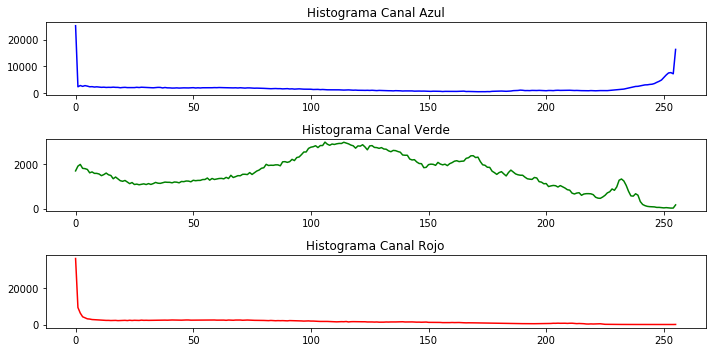

In [228]:
plot_rgb_histograms(img02)

In [229]:
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

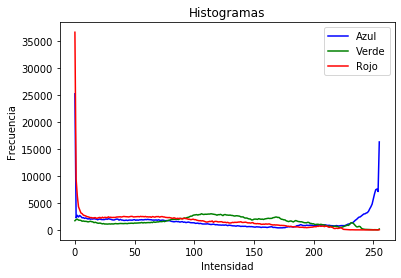

In [230]:
plot_rgb_histogramTodo(img02)

In [231]:
# Correcion gama
def contraste_openCV(image = None, value = 1.0, title = ""):
    img_corrected = cv2.pow(image, value)
    imshow(title, img_corrected)
    return img_corrected

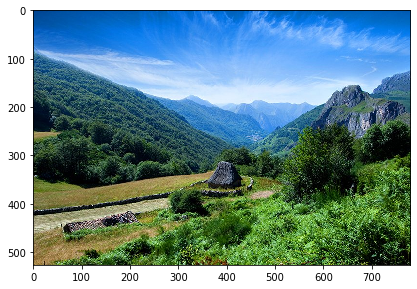

array([[[142,  66,   0],
        [143,  67,   1],
        [143,  67,   1],
        ...,
        [176,  87,   0],
        [176,  87,   0],
        [176,  87,   0]],

       [[143,  67,   1],
        [143,  67,   1],
        [143,  67,   1],
        ...,
        [177,  88,   0],
        [177,  88,   0],
        [177,  88,   0]],

       [[143,  68,   0],
        [143,  68,   0],
        [143,  68,   0],
        ...,
        [178,  90,   0],
        [178,  90,   0],
        [178,  90,   0]],

       ...,

       [[ 54, 115, 147],
        [ 68, 129, 161],
        [ 70, 131, 163],
        ...,
        [  0,  11,   0],
        [  0,  19,   0],
        [  0,  31,   5]],

       [[ 58, 119, 151],
        [ 65, 126, 158],
        [ 66, 127, 159],
        ...,
        [  1,  36,  10],
        [ 13,  53,  25],
        [ 28,  70,  39]],

       [[ 78, 139, 171],
        [ 68, 129, 161],
        [ 65, 126, 158],
        ...,
        [ 63, 109,  80],
        [ 60, 110,  78],
        [ 48, 102,  67]]

In [232]:
contraste_openCV(img02)

In [233]:
# Correccion Gama
#https://es.wikipedia.org/wiki/Correcci%C3%B3n_gamma
def generar_histograma(image = None):
    hist_full = cv2.calcHist([image], [0], None, [256], [0,256])
    plt.plot(hist_full)
    plt.show()
    return hist_full


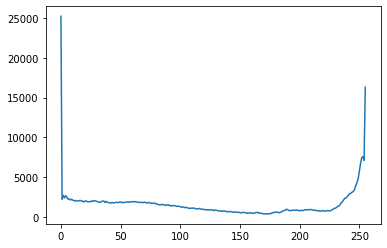

In [234]:
generar_histograma(img02)

In [239]:
# Correccion Gama
def correccion_gamma(gamma = 0.0):
    nueva = np.empty((1, 256), np.uint8)
    print(nueva)
    
    for i in range(256):
        nueva[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
    res = cv2.LUT(img02, nueva)
    imshow("gamma corregida", res)
    generar_histograma(res)
    return res


[[  0   1   0 150   0   0   4  74   5 240   0  28   0 158  64  39  25  26
   27   3  24  28  17   5   4   0  17   5   5   4  66  16 161  17 148  13
  160  20 145   4   0 160   2   0  16  10   2   1  10  28  23  16   3   6
   29  16 252  75 176  21  84  75 176  22  84  91  75 176  20  84  91  88
  185   0   3 255 192  56  89 196 212 236 192 192  17  18  57  49   0  47
  236  50 244 236 244 236  48  75  83  88   7  16   5 237   7   5 237   1
  176  28  16  17  23  57  89  34   1  64  50  85   4  86   5  86   7 122
    4 122   5 118  27 135  25   7   4   0   4  25   4  26   4  27   5  28
  116   0 118   6 117  26 115  27 116  28 130   0 134  25 130  26 130  27
  130  28 168   0 168  27  17  93   0  93  37  33  21  33  53  54   0  55
   62   1  53  52  38  35  34   6   7  53  62   1  51  50   4  21  20   6
    7   6   0   1 137   2 193 252  76 115   1 141  51  97  77 167 134  95
  211 120 122 212  88 232   1  20  69  91  25 254 244 170 170 170 119   1
  145  58 109 151  73 119 150  66  67 

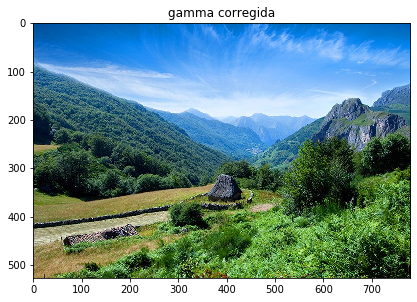

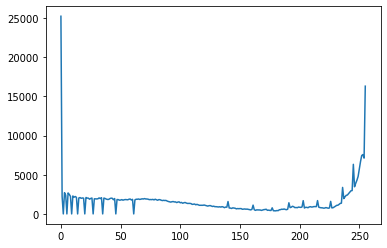

array([[[150,  75,   0],
        [151,  76,   1],
        [151,  76,   1],
        ...,
        [182,  96,   0],
        [182,  96,   0],
        [182,  96,   0]],

       [[151,  76,   1],
        [151,  76,   1],
        [151,  76,   1],
        ...,
        [183,  97,   0],
        [183,  97,   0],
        [183,  97,   0]],

       [[151,  77,   0],
        [151,  77,   0],
        [151,  77,   0],
        ...,
        [184,  99,   0],
        [184,  99,   0],
        [184,  99,   0]],

       ...,

       [[ 63, 124, 155],
        [ 77, 138, 168],
        [ 79, 140, 170],
        ...,
        [  0,  15,   0],
        [  0,  24,   0],
        [  0,  38,   7]],

       [[ 67, 128, 159],
        [ 74, 135, 165],
        [ 75, 136, 166],
        ...,
        [  1,  43,  13],
        [ 17,  62,  31],
        [ 34,  79,  47]],

       [[ 87, 147, 177],
        [ 77, 138, 168],
        [ 74, 135, 165],
        ...,
        [ 72, 118,  89],
        [ 69, 119,  87],
        [ 56, 111,  76]]

In [240]:
correccion_gamma(0.9)